# Homework #7

**See Canvas for the HW #7 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

None this time around!

## B. Computational Problems

## Problem B.1: Bootstrap confidence interval for standard deviation

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$ (see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution). Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


*Note: The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But `R` uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$.*

To be sure that you are properly simulating from the right gamma distribution, see the help file for `rgamma()` (meaning, run the line: ?rgamma).


**B.1(a) [10 points] There is a "theory-derived" confidence interval for the standard deviation, which depends on the $\chi^2$ distribution. Research this confidence interval (or find the correct section of the Unit 5 Notes). State why a $\chi^2$ confidence interval is not valid in this context.**

Chi-squared distribution definition -- with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables 

Since our variables are independent and identically distributed from a gamma distribution, the chi-squared distribution cannot be used because it assumes a standard normal distribution 

**B.1(b) [6 points] Simulate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).**

Standard deviation for gamma distribution = $ \sqrt{\frac{\alpha}{\beta^2}}$

In [7]:
n = 8
sample = rgamma(n, shape = 3, scale = 1/4)

true = sqrt(3 / 4^2)
cat("The true population standard deviation is:", true)

The true population standard deviation is: 0.4330127

**B.1(c) [6 points] Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. To avoid loops, use the `replicate()` function.**

In [8]:
B = 200

bootstrap = replicate(B, sample(sample, size = n, replace = TRUE))
dim(bootstrap)

[1]   8 200

Each column represents one bootstrap sample of size n=8 (sampled with replacement)

Each row represents the values drawn for each position across a bootstrap sample 

**B.1(d) [4 points] Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. To avoid loops, use the `apply()` function. Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.**

The sample standard deviation is:  0.3585388

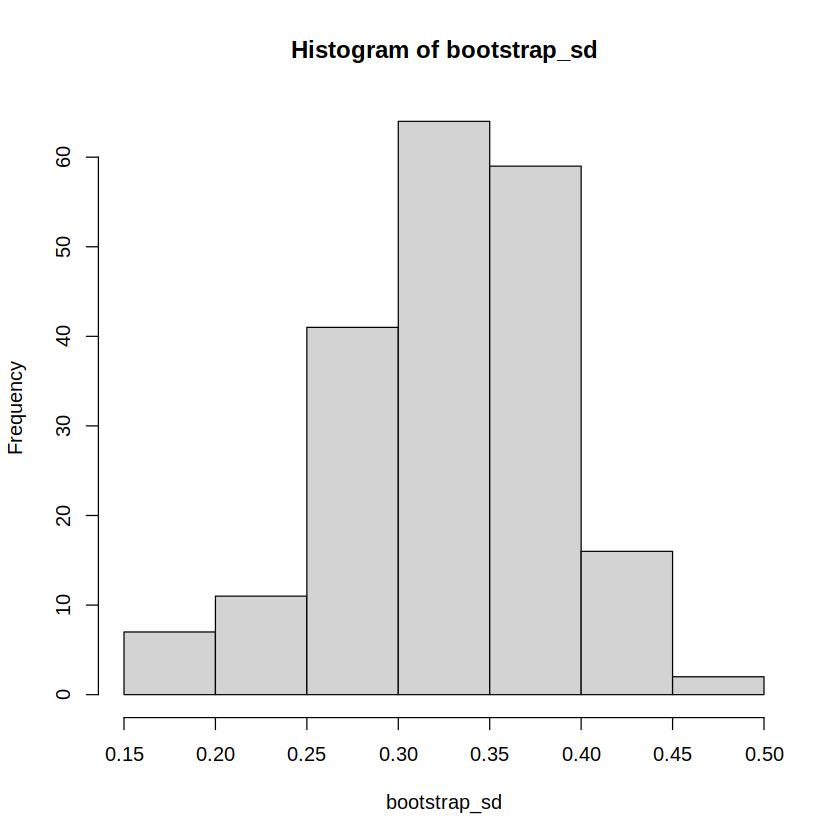

In [14]:
sample_sd = sd(sample)
cat("The sample standard deviation is: ", sample_sd)

bootstrap_sd = apply(bootstrap, 2, sd) #2 indicates a column operation 
hist(bootstrap_sd)

**B.1(e) [8 points] Use the `quantile()` function to find the $5$th and $95$th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$.**

$$ \theta_{lower} = \frac{sd_{sample} * sd_{theoretical}}{s_{i upper}^{*}} $$
$$ \theta_{upper} = \frac{sd_{sample} * sd_{theoretical}}{s_{i lower}^{*}} $$

In [16]:
sample_sd = sd(sample)
true = sqrt(3 / 4^2)

#bootstrap confidence intervals 
percentiles = quantile(bootstrap_sd, probs = c(0.05, 0.95))
lower_perc_bound = percentiles[1]
upper_perc_bound = percentiles[2]
percentile_CI = c(lower_perc_bound, upper_perc_bound)
cat("The confidence interval for the bootstrap percentile is: ", percentile_CI)

The confidence interval for the bootstrap percentile is:  0.2262329 0.4256301

In [17]:
#pivot confidence intervals 
lower_pivot_bound = (sample_sd * true) / upper_perc_bound
upper_pivot_bound = (sample_sd * true) / lower_perc_bound
pivot_CI = c(lower_pivot_bound, upper_pivot_bound)
cat("The confidence interval for the bootstrap pivot is: ", pivot_CI)

The confidence interval for the bootstrap pivot is:  0.3647577 0.6862481

**B.1(f) [4 points] Interpret this confidence interval.**

We are confident that 90% of the time, the true standard deviation will be within the bounds (0.36, 0.69)

## Problem B.2: The parametric bootstrap

Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are ultimately interested in an estimator for $\theta = \mu^2$.


Thus far, we have been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$.

**B.2(a) [4 points] Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance.**

In [21]:
n = 20
mu = 2
var = 1

x = rnorm(n, mean=mu, sd = var)

sample_mean = mean(x)
cat("The sample mean is: ", sample_mean)

The sample mean is:  1.958866

In [22]:
sample_var = var(x)
cat("The sample variance is: ", sample_var)

The sample variance is:  1.212123

**B.2(b) [4 points] Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a).**

$\bar{X}$ is an estimator for $\mu$ because it is the mean of the sample. $S^2$ is an estimator for $\sigma^2$ because it is the varaince of the sample. So, 

$$ \hat{N} = (\bar{X}, S^2) $$

where, 

$ \bar{X} = \text{sample mean} = 1.96 $ and   $ S^2 = \text{sample variance} = 1.21 $

**B.2(c) [4 points] Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{i,1},...,X_{i,20})$, compute $$ \widehat{\theta}^*_i = \left(\frac{1}{20}\sum^{20}_{j=1}X^*_{i,j}\right)^2,$$ where $i = 1,...,B$ (I assume that each sample is the row of a matrix $X^*_{i, j}$; swap the indices if you used columns).**

In [27]:
B = 500

bootstraps = matrix(NA, B, n)
theta_star = numeric(B)

for (i in 1:B){
    bootstraps[i, ] = rnorm(n, mean = sample_mean, sd = sqrt(sample_var))
    theta_star[i] = (mean(bootstraps[i, ]))^2
}

head(theta_star)

[1] 2.592240 3.726781 3.789192 4.941552 3.967013 3.647558

**B.2(d) [8 points] Compute an estimate of the bias:**

\begin{align*}
\widehat{\text{Bias}}(\widehat{\theta}) \approx \left( \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i \right) - \bar{X}^2.
\end{align*}

**Compare this to the exact bias using the formula $\displaystyle \text{Bias}(\widehat{\theta}) = \text{Bias}(\bar{X}^2) = E[\bar{X}^2] - \mu^2 = \frac{\sigma^2}{n}$.**

In [33]:
bias_estimate = mean(theta_star) - sample_mean^2
cat("The bias estimate is:", bias_estimate)

The bias estimate is: 0.07705448

In [32]:
exact_bias = sample_var / n
cat("The exact bias is:", exact_bias)

The exact bias is: 0.06060617

**B.2(e) [8 points] Compute an estimate of the variance:**

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{i=1}\big(\widehat{\theta}^*_i - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i.
\end{align*}
**Compare this to the exact variance:**

\begin{align*}
\text{Var}(\bar{X}^2) &=  4\frac{\sigma^2\mu^2}{n} + 2\frac{\sigma^4}{n^2}
\end{align*}

In [37]:
variance_estimate = var(theta_star)
cat("The variance estimate is: ", variance_estimate)

The variance estimate is:  0.9547296

In [38]:
exact_variance = 4 * ((var * mu^2) / n) + (2 * (var^2 / n^2))
cat("The exact variance is: ", exact_variance)

The exact variance is:  0.805

#### (f) [10 points] True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

True - increasing B reduces the variability in the bootstrap estimate. According to the law of large numbers, the more simulations there are, the closer the distribution resembles the true values. Even though n does not increase, bootstrapping takes random values from the original sample and distributes them in a way that provides B amount of columns of bootstrap samples that are the same length as the original sample size. Taking estimates of each column gives a mean and standard deviation, so with more columns, the closer the average of these estimates will approach the true values. 

## Problem B.3 Bootstrap assumptions 
The dataset `nyc_births.csv` gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.


**B.3(a) [10 points] Load the dataset, and construct a plot of births per month against the month/year column. Analyze the plot. Do you notice anything interesting?** *Hint: you may need to use the line `births$date = as.Date(births$date, "%Y-%m-%d")` to convert the date column in your data frame to a more appropriate format (here `births` is the name of the dataframe loaded from the file `nyc_births`).*

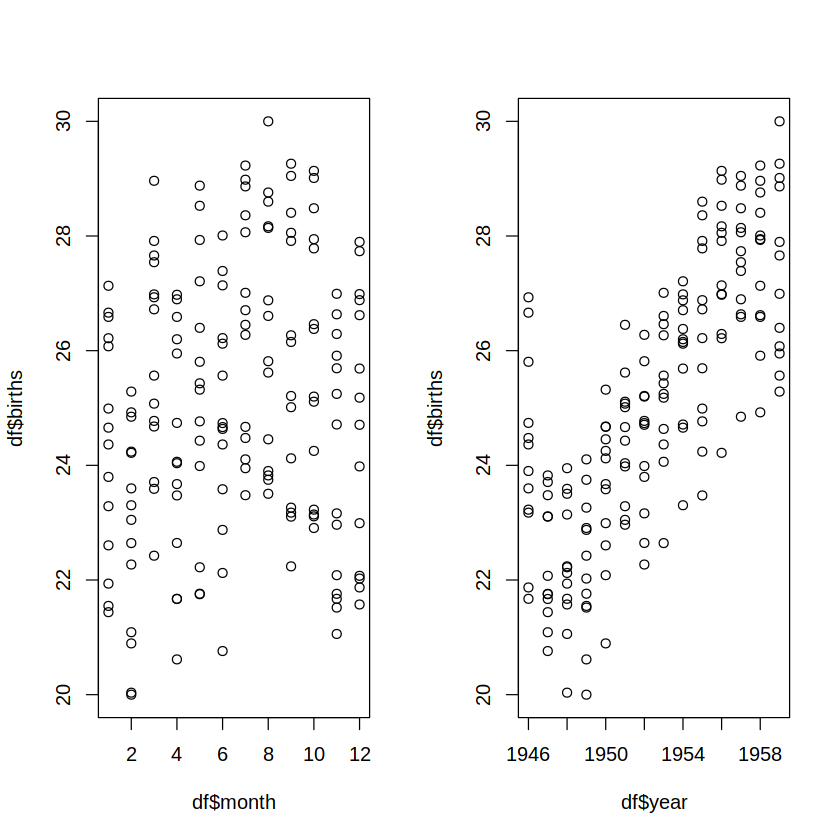

In [47]:
df = read.csv('nyc_births.csv')
df$date = as.Date(df$date, "%Y-%m-%d")

par(mfrow = c(1, 2))
plot(df$month, df$births)
plot(df$year, df$births)

The number of births over a number of months appears to have some seasonal trends where more births happen in the summer/fall months. It kind of looks like it has a type of skewed distribution 

The number of births over a number of years has a clear positive correlation. Where as the years go on, the more births there are 

**B.3(b) [10 points] Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for these data.**

The bootstrap method relies on the distribution to be independent and identically distributed. We see in the previous graph that there are fluxuations with the seasons, so not all these data points are identically distributed. If they were, we would see a uniform distribution with no clear patterns. We would need to conduct a confidence interval that doesn't depend on the i.i.d principles. 